# Anomaly Detection:

# Project planning: 
1. Acquire the data from the codeup SQL server: 
    - Connect the two databases: cohorts and logs
    - Create a csv file for easier acsess
2. Prepare the data:
    - Look at the data in detail: describe, info, any nulls
    - Figure out if nulls could be a potential anomaly
3. Explore the data: 
    - Explore the data with the initial question in mind. 
    - Be able to provide answers to three of the questions in time for the meeting on friday
    - Give reasoning behind the results for each question.

## Scenario: 
We are data anaylists looking at `curriculum data` from the codeup's curriculum access logs. We have to provide feedback for our boss by Friday afternoon.

### The Request is as Follows: 
"I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.""

### Questions:
1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

In [1]:
# Imports:
import pandas as pd
import numpy as np
import wrangle as wr


#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# warnigns:
import warnings
warnings.filterwarnings("ignore")

# Acquire the data: 

In [2]:
# using the acquire_logs function acquire the data: 
df = wr.acquire_logs()

In [3]:
df

,name,start_date,end_date,program_id,date,time,path,user_id,cohort_id,ip
0,Arches,2014-02-04,2014-04-22,1,2018-01-31,15:52:32,javascript-i/arrays,11.0,1.0,97.105.19.61
1,Arches,2014-02-04,2014-04-22,1,2018-01-31,15:52:29,javascript-i,11.0,1.0,97.105.19.61
2,Arches,2014-02-04,2014-04-22,1,2018-01-31,14:59:38,javascript-i/arrays,11.0,1.0,97.105.19.61
3,Arches,2014-02-04,2014-04-22,1,2018-01-31,14:32:22,javascript-i,11.0,1.0,97.105.19.61
4,Arches,2014-02-04,2014-04-22,1,2018-01-31,14:32:19,javascript-i/arrays,11.0,1.0,97.105.19.61
...,...,...,...,...,...,...,...,...,...,...
847331,Deimos,2019-09-16,2020-02-27,2,2020-10-29,13:35:58,mysql/aliases,495.0,51.0,72.191.58.18
847332,Deimos,2019-09-16,2020-02-27,2,2020-10-29,13:35:54,mysql/functions,495.0,51.0,72.191.58.18
847333,Deimos,2019-09-16,2020-02-27,2,2020-10-29,13:35:50,mysql/aliases,495.0,51.0,72.191.58.18
847334,Deimos,2019-09-16,2020-02-27,2,2020-10-29,13:35:27,mysql/functions,495.0,51.0,72.191.58.18


# Data Dictionary: 
| **Variable** | **Explanation** | 
|--------------|-----------------|
| Name | This is the name of the cohort |
| Start_date | When the cohort started |
| End_date | When the cohort ended | 
| Program_id | Which program the user is in (1,2,3,4)|
| Date | The day the user accesed the path |
| Time | The time the user accessed the path |
| Path | The URl Path  |
| User_id | The users unique identification number |
| Cohort_id | The id number of the cohort |
| ip | Internet adress fpr the path |

# Prepare the data: 
There are two functions for this:
1. To prepare the database without a timeseries index <br>
2. To prepare the databse with a timeseries index. <br>

The reason I have two functions is too explore discret and time sereies data seperatly.

In [4]:
# prepare without a timeseries index: 
df_discrete = wr.prep_logs_plain()

In [5]:
# prepare with a timeseries index:
df_time = wr.prep_logs_time()

# Program ID: 
Web Developlment = 1,2,4 <br>
Data Science = 3

In [6]:
# Discrete data: Web Development and Data Scince
dd_ds = df_discrete[df_discrete.program_id == 3]
dd_wd = df_discrete[df_discrete.program_id != 3]
# Timeseries data: Web Development and Data Science
dt_ds = df_time[df_time.program_id == 3]
dt_wd = df_time[df_time.program_id != 3]

# Exploration of Questions: 

<div class="alert alert-info" role="alert">
  1. Which lesson appears to attract the most traffic consistenly across cohorts (per program)?
</div>

### Data Science:

In [7]:
# how many times a path has been looked at
dd_ds.groupby(['path']).size().reset_index(name='count').sort_values(ascending = False, by = 'count').head()

,path,count
3,/,8358
592,search/search_index.json,2203
397,classification/overview,1785
19,1-fundamentals/modern-data-scientist.jpg,1655
17,1-fundamentals/AI-ML-DL-timeline.jpg,1651


### Web Development: 

In [8]:
# how many times a path has been looked at
dd_wd.groupby(['path']).size().reset_index(name='count').sort_values(ascending = False, by = 'count').head()

,path,count
4,/,37496
1599,javascript-i,18193
2024,toc,17580
1861,search/search_index.json,15331
1572,java-iii,13162


#### Summary:
The most common lesson across data science cohorts is classification/overview. While for web development it is the javascript-i lesson. These lessons could be the most common if they are the most challenging for students, or are lessons that have more learning time associated with them. 

<div class="alert alert-info" role="alert">
  2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
</div>

### Data Science:

In [9]:
# Top Lessons for Data Science Cohorts: 
wr.top_lesson(dd_ds)

,name,path,count
0,Darden,classification/overview,1109
1,Bayes,1-fundamentals/modern-data-scientist.jpg,650
2,Florence,fundamentals/modern-data-scientist.jpg,627
3,Curie,6-regression/1-overview,595
4,Easley,classification/scale_features_or_not.svg,463


In [10]:
# Lets see how many times classification was looked at: 
dd_ds[dd_ds.path == 'classification/overview'].groupby('name').path.value_counts()

name      path                   
Bayes     classification/overview      35
Curie     classification/overview     136
Darden    classification/overview    1109
Easley    classification/overview     445
Florence  classification/overview      60
Name: path, dtype: int64

In [11]:
# Least lessons for Data Science Cohorts: 
wr.least_lesson(dd_ds)

,name,path,count
0,Florence,where,1
1,Bayes,prep,1
2,Darden,regression/old_project,1
3,Easley,advanced-topics/virtual-environments,1
4,Curie,spring,1


### Web Development:

In [12]:
# top lessons for Web Development Cohorts: 
wr.top_lesson(dd_wd).head()

,name,path,count
0,Jupiter,toc,1866
1,Staff,javascript-i,1817
2,Apex,search/search_index.json,1497
3,Zion,toc,1465
4,Ceres,search/search_index.json,1380


In [13]:
# lets isolate the toc lesson
dd_wd[dd_wd.path == 'toc'].groupby('name').path.value_counts().sort_values(ascending = False).head()

name      path
Jupiter   toc     1866
Zion      toc     1465
Fortuna   toc     1293
Hyperion  toc     1022
Wrangell  toc      991
Name: path, dtype: int64

In [14]:
# lets isolate javascript-i the lesson
dd_wd[dd_wd.path == 'javascript-i'].groupby('name').path.value_counts().sort_values(ascending = False).head()

name      path        
Staff     javascript-i    1817
Ceres     javascript-i    1003
Jupiter   javascript-i     926
Hyperion  javascript-i     910
Marco     javascript-i     907
Name: path, dtype: int64

In [15]:
# Least lessons for Web Development Cohorts:
wr.least_lesson(dd_wd).head()

,name,path,count
0,Andromeda,1-fundamentals/1.1-intro-to-data-science,1
1,Mammoth,capstone-workbook,1
2,Luna,jdbc,1
3,Marco,appendix/angular/controllers,1
4,Zion,web-design/ux/layout,1


#### Summary: 
For the lesson that has a large differnce in traffic between data science cohorts is classification/overview. Out of total references by the cohorts, Darden viewed it 61 percent while Bayes only viewed it less than 0.005 %. This could be caused by a difference between the number of students currently enrolled in the program. <br>

For the lesson that has a large differnce in traffic between web development cohorts is over the toc lesson. Juipter acessed this lesson the most while mammoth only acessed it once. 


<div class="alert alert-info" role="alert">
  4.Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
</div>

In [53]:
# what is the average path amount for users:
df.groupby('user_id')['path'].nunique().mean()

118.29967069154775

I want to look at users that look ar more pages than the average of the total dataframe. This could indicate suspicious activity.

I also want to look at users that have multiple anommalies.

In [60]:
# anomalies for all data:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df_time.user_id.unique()):
    user_df = wr.find_anomalies(df_time, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [50]:
# lets look at the anomalies: 
anomalies.sort_values(by='pages_one_user', ascending=False).head()

,pages_one_user,midband,ub,lb,pct_b,user_id
datetime,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341.0
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138.0
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526.0
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658.0
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521.0


### Suspicious Activity:  
- Look at users: 
    - 341, 138, 526
    - 80, 146, 18

In [54]:
# How anomalies does each user have?
anomalies.user_id.value_counts().head()

80.0     11
146.0    11
18.0     10
291.0     9
51.0      8
Name: user_id, dtype: int64

### Does it differ across web development or data science? 

In [46]:
# Web development anomalies
span = 30
weight = 3.5

anomalies_wd = pd.DataFrame()
for u in list(dt_wd.user_id.unique()):
    user_df = wr.find_anomalies(dt_wd, u, span, weight)
    anomalies_wd = pd.concat([anomalies_wd, user_df], axis=0)

In [55]:
# How anomalies does wd each user have?
anomalies_wd.user_id.value_counts().head()

146.0    11
80.0     11
18.0     10
291.0     9
179.0     8
Name: user_id, dtype: int64

In [38]:
# Data science anomalies
span = 30
weight = 3.5

anomalies_ds = pd.DataFrame()
for u in list(dt_ds.user_id.unique()):
    user_df = wr.find_anomalies(dt_ds, u, span, weight)
    anomalies_ds = pd.concat([anomalies_ds, user_df], axis=0)

In [56]:
# How anomalies does each  ds user have?
anomalies_ds.user_id.value_counts().head()

466.0    4
468.0    4
469.0    4
585.0    3
476.0    3
Name: user_id, dtype: int64

### Vizualiations 

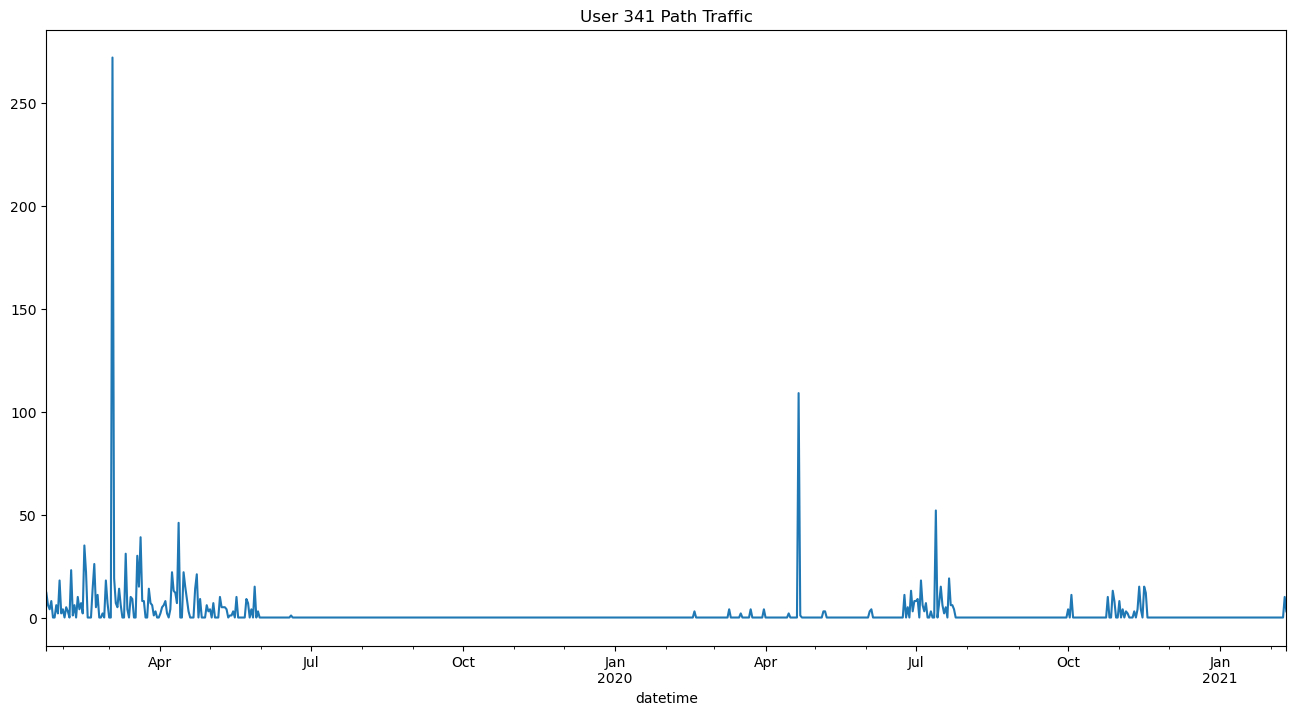

In [58]:
# lets look at user 341
user_80 = wr.one_user_df_prep(dt_wd, 341)
user_80.plot(figsize=(16,8))
plt.title('User 341 Path Traffic')
plt.show()

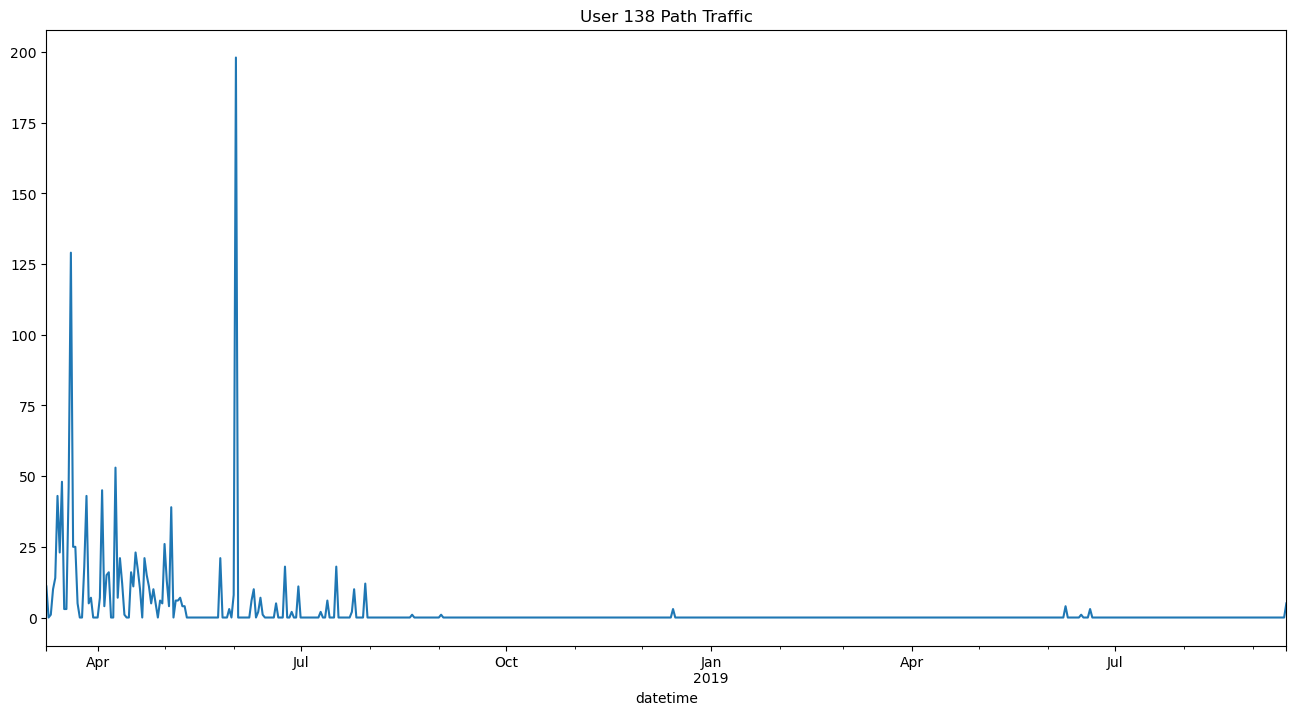

In [62]:
# lets look at user 138
user_138 = wr.one_user_df_prep(dt_wd, 138)
user_138.plot(figsize=(16,8))
plt.title('User 138 Path Traffic')
plt.show()

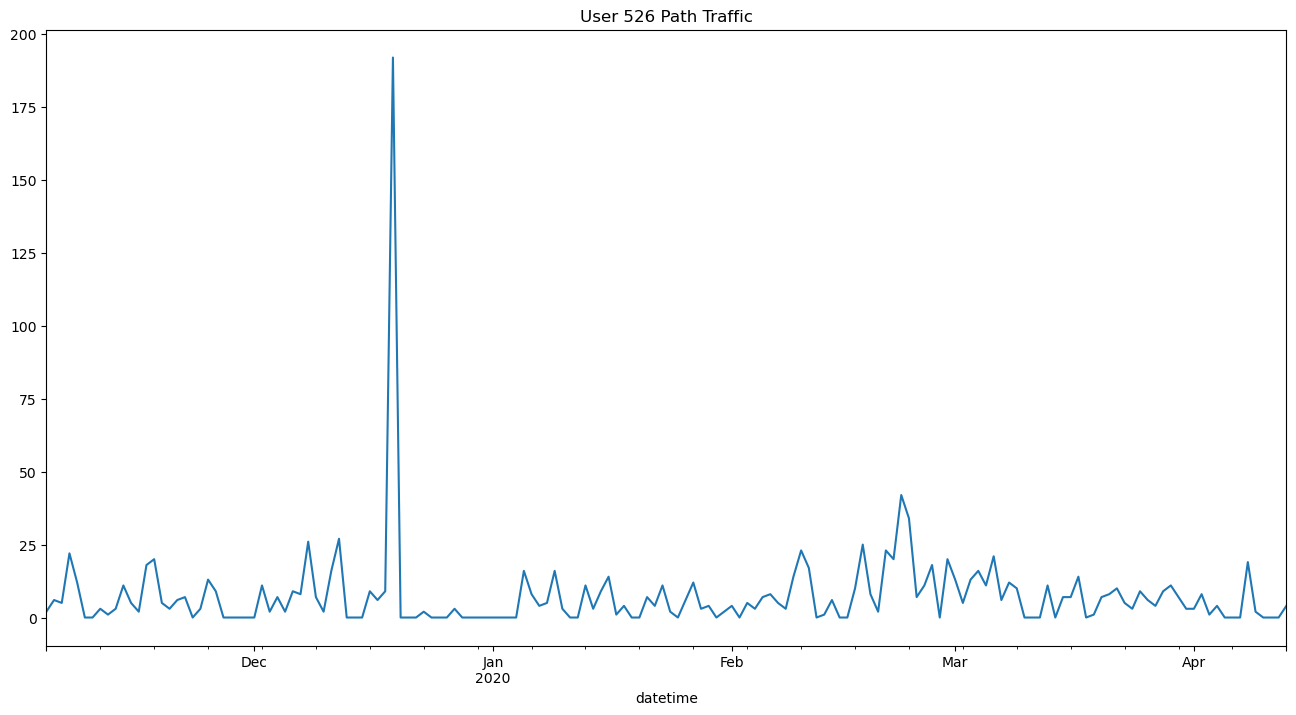

In [65]:
# lets look at user 526
user_526 = wr.one_user_df_prep(dt_wd, 526)
user_526.plot(figsize=(16,8))
plt.title('User 526 Path Traffic')
plt.show()

In [64]:
80, 146, 18

(80, 146, 18)

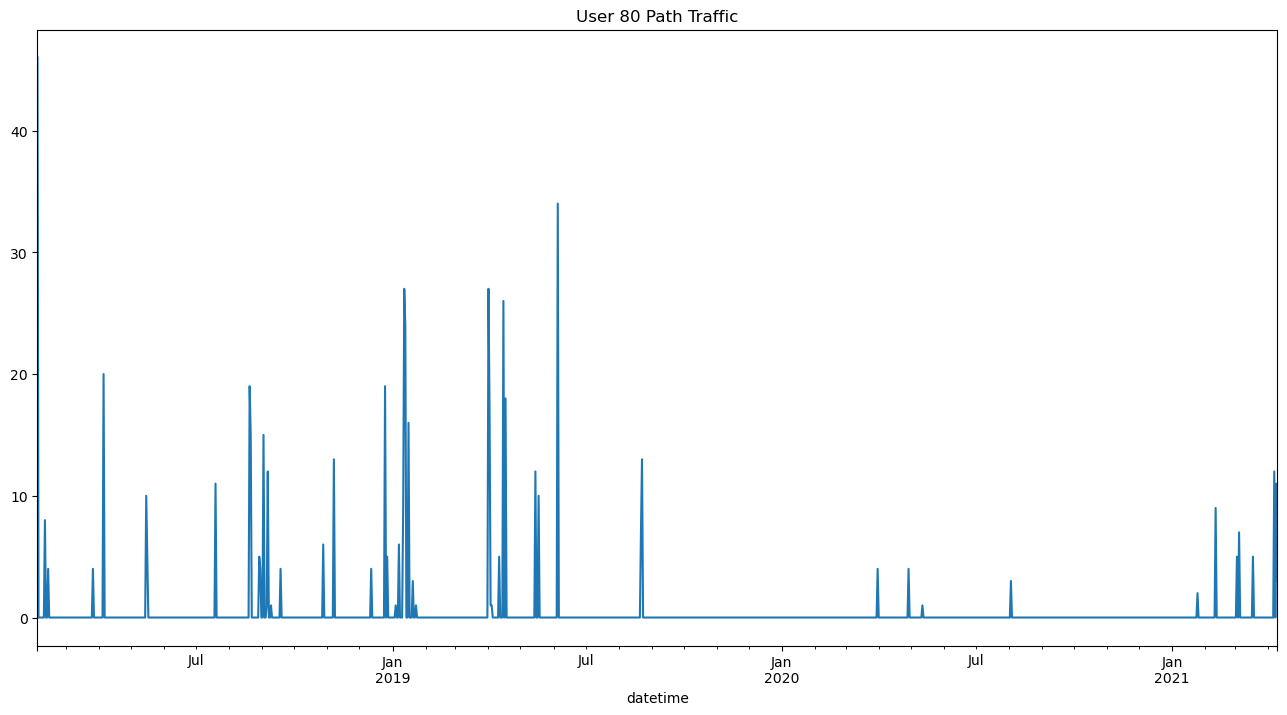

In [66]:
# lets look at user 80
user_80 = wr.one_user_df_prep(dt_wd, 80)
user_80.plot(figsize=(16,8))
plt.title('User 80 Path Traffic')
plt.show()

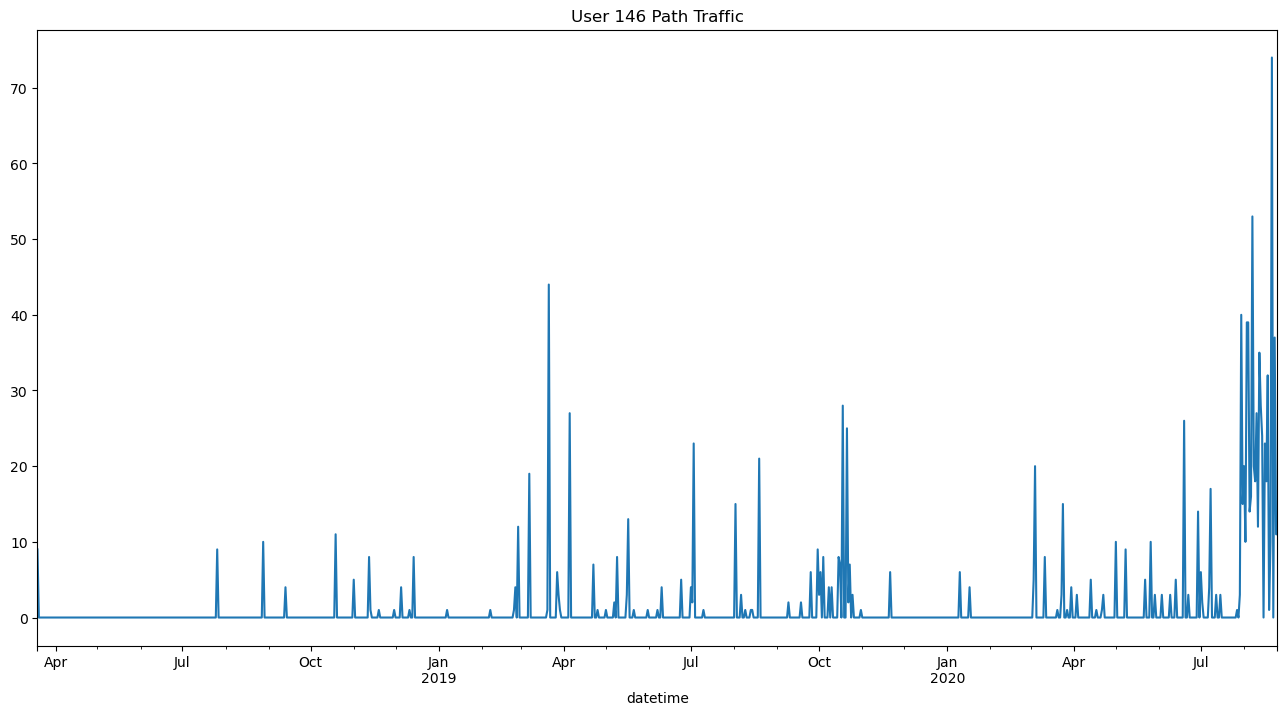

In [67]:
# lets look at user 146
user_146 = wr.one_user_df_prep(dt_wd, 146)
user_146.plot(figsize=(16,8))
plt.title('User 146 Path Traffic')
plt.show()

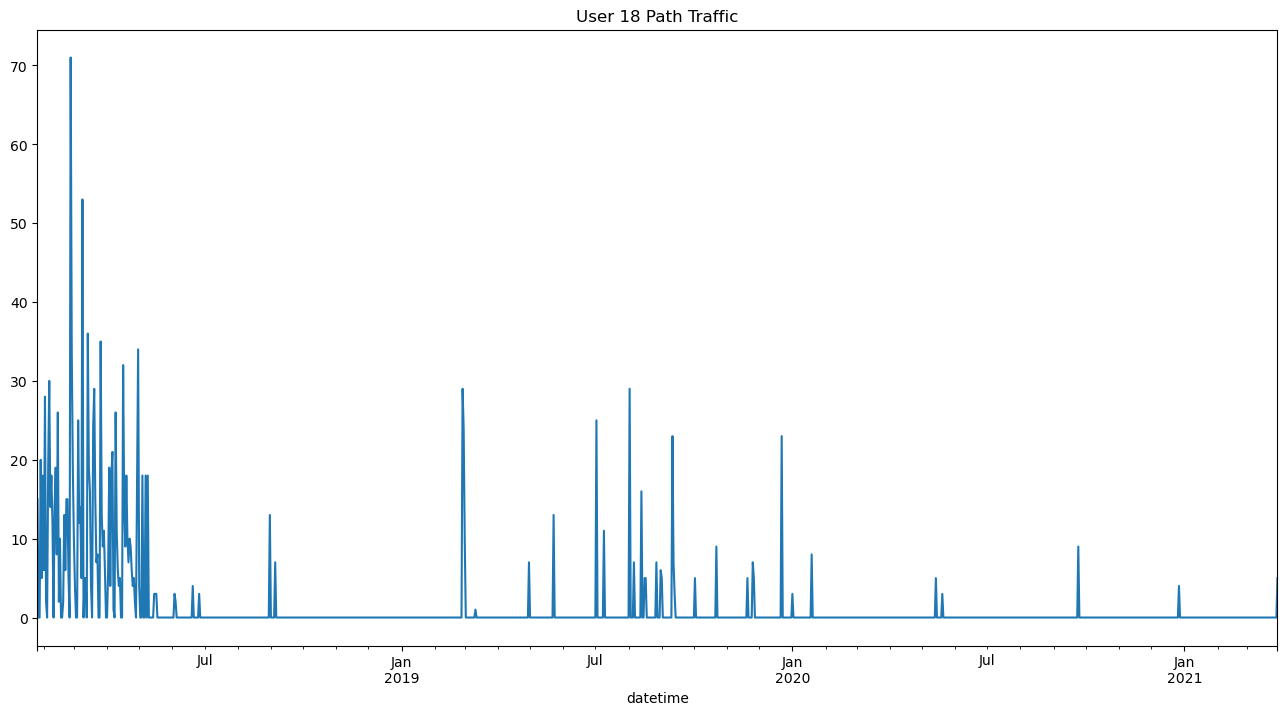

In [68]:
# lets look at user 18
user_18 = wr.one_user_df_prep(dt_wd, 18)
user_18.plot(figsize=(16,8))
plt.title('User 18 Path Traffic')
plt.show()

# Summary: 
Look at the anommalies there are 2 major things I can conclude. 
1. When users access more than the average amount of paths, 188, it is normally at the beginning of the user's tenure. The user would access a large amount of paths and then normally did not access the curriculum again. Users that fit this trend : 341, 138, 526
2. When users have mulitple anomalies, it is over a longer duration of time. The users do not breach the average path access of 188, but however are inconsistent with acessing the curriculum, and have very high peaks of access and then nothing. Users that meet this trend: 80, 146, 18.

# Conclusion: 
1. Question One: 
    - The most common lesson across data science cohorts is classification/overview. While for web development it is the javascript-i lesson.
2. Question two: 
    - For the lesson that has a large differnce in traffic between data science cohorts is classification/overview. Darden viewed it the most while bayes viewed it the least. For the lesson that has a large differnce in traffic between web development cohorts is over the toc lesson. Juipter acessed this lesson the most while mammoth only acessed it once.
4. Question four: 
    - Suspicious acitivy occurs in users: 341, 138, 526. The accsessed a high volume of paths in a short amount of time. 
    - Users with more suspicious activity over a longer period of time are 18, 146, and 18. 
# Recomendations:
1. Question one:
    - These lessons could be the most common if they are the most challenging for students, or are lessons that have more learning time associated with them. 
    - I would spend more time during these lesssons helping and assisting students making sure they understand the content and material.
2. Question two: 
    - The large difference between lessons could be attributed to a difference in class size. 
    - To make lessons more balanced across cohorts it may be benificial to similarly sized classes. This may not always be the case, but this a resolutioin if the issue needs to be resolved.
4. Question four: 
    - To find a user that may have suspicious activity I would recomended looking at to things:
        - Does the user look at large volume of paths during a short period of time?
        - Does the user look at a many paths sporadically over a longer period of time?
    - These could be users who are performing harmfull activities.

# Next Steps:
- I would like to furthure explore and more time to answer all the questions that were asked from the data.
- I would also like to include future discoveries in this notebook. 